# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Load the CSV file
df = pd.read_csv("./Stock_Data/clean_stocks.csv") 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df['Daily_Return'] = df['Close'].pct_change()
df.dropna(inplace=True)  # Remove any initial NaNs
df

,Ticker,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,,
2023-02-07,GOOG,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,-0.301390
2023-02-07,MSFT,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,1.476490
2023-02-07,NFLX,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,0.356518
2023-02-08,GOOG,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,-0.724480
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,0.519200
...,...,...,...,...,...,...,...,...
2023-05-04,NFLX,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,0.934857
2023-05-04,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,-0.672018
2023-05-05,MSFT,305.720001,311.970001,304.269989,310.649994,310.649994,28181200,1.952666


# 1. Statistical Analysis

### 1.1 Distribution Analysis of Daily Returns

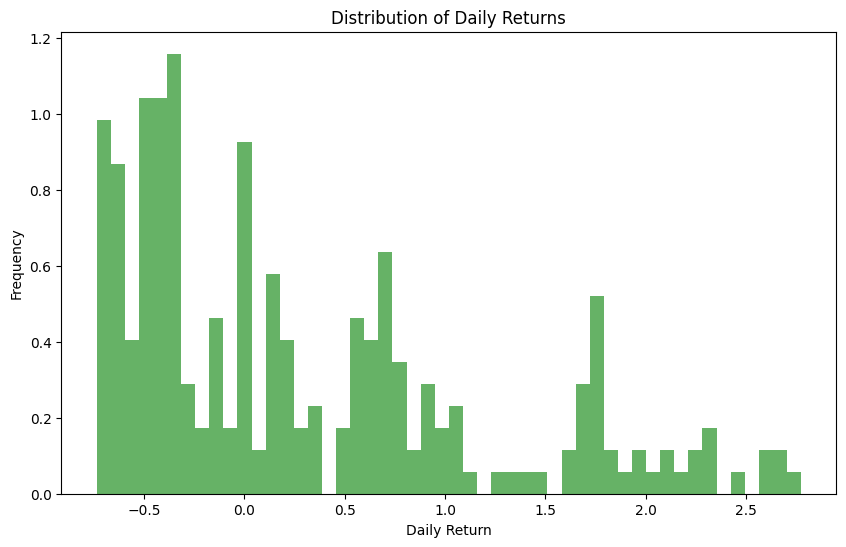

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'], bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### QQ Plot to check normality

<Figure size 1000x600 with 0 Axes>

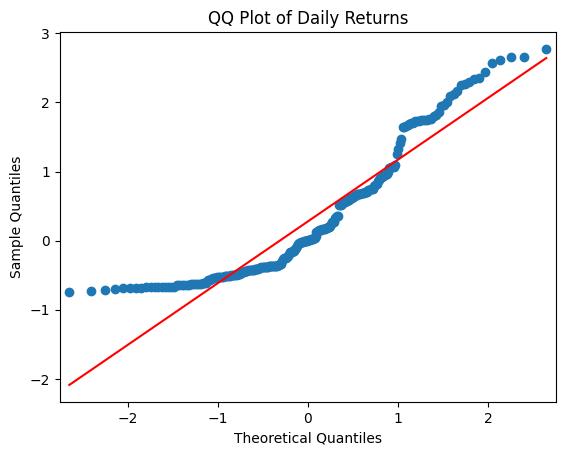

In [4]:
plt.figure(figsize=(10, 6))
sm.qqplot(df['Daily_Return'], line='s')
plt.title('QQ Plot of Daily Returns')
plt.show()

### Shapiro-Wilk Test for Normality

In [5]:
stat, p = stats.shapiro(df['Daily_Return'])
print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Statistic: 0.8790408968925476, p-value: 4.4558638463004785e-13
Sample does not look Gaussian (reject H0)


### 1.2 Hypothesis Testing

### Hypothesis 1: The average daily return is significantly different from zero.
### Null Hypothesis (H0): The average daily return is equal to zero.
### Alternative Hypothesis (H1): The average daily return is not equal to zero.

In [6]:
t_stat, p_value = stats.ttest_1samp(df['Daily_Return'], 0)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 4.8516534649196865, p-value: 2.179536099568461e-06


In [7]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The average daily return is significantly different from zero.")
else:
    print("Fail to reject H0: The average daily return is not significantly different from zero.")

Reject H0: The average daily return is significantly different from zero.


### Hypothesis 2: The daily returns are skewed.
### Null Hypothesis (H0): The skewness of daily returns is zero.
### Alternative Hypothesis (H1): The skewness of daily returns is not zero.

In [8]:
skewness = stats.skew(df['Daily_Return'])
print(f"Skewness: {skewness}")

Skewness: 0.9779879097830871


## Approximate test for skewness (assuming normality under null)

In [9]:
n = len(df['Daily_Return'])
z_skew = skewness / np.sqrt(6/n)
p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))

print(f"Z-score for skewness: {z_skew}, p-value: {p_skew}")

Z-score for skewness: 6.262178089048375, p-value: 3.7963698851228855e-10


In [10]:
if p_skew < alpha:
    print("Reject H0: The daily returns are skewed.")
else:
    print("Fail to reject H0: The daily returns are not skewed.")

Reject H0: The daily returns are skewed.


### 1.3 Quantile Analysis

In [11]:
quantiles = df['Daily_Return'].quantile([0.01, 0.05, 0.95, 0.99])
print("\nQuantiles of Daily Returns:")
print(quantiles)


Quantiles of Daily Returns:
0.01   -0.706945
0.05   -0.672771
0.95    2.118270
0.99    2.640791
Name: Daily_Return, dtype: float64


### 1.4 Rolling Correlations

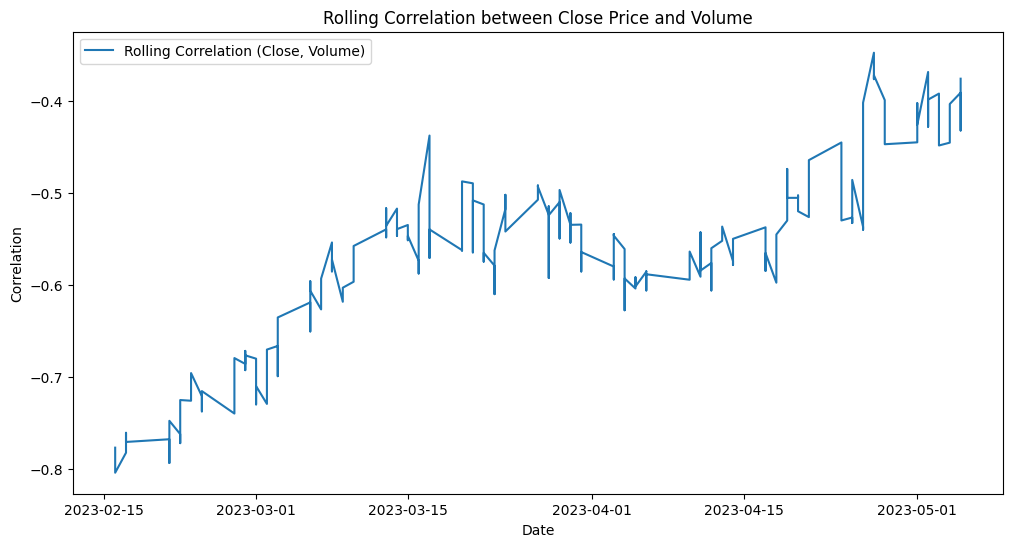

In [12]:
rolling_corr = df['Close'].rolling(window=30).corr(df['Volume'])
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='Rolling Correlation (Close, Volume)')
plt.title('Rolling Correlation between Close Price and Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()